In [7]:
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from simulation import agent_simulation as sim_
from cost import compute_cost as co_
import torch
from torchviz import make_dot
from optimize import AdamOptimization as aopt_
from bioesag import BioEsAg as bio_

In [8]:
a = np.zeros((3, 40, 40), dtype=np.float32)
a[-1, -1, :5] = (1, 0, 100, 20, .2)
a[-1, 0, :3] = (.6, .1, .9)
a[1, :, :5] = 1

In [9]:
t_ = sim_(a, 1)

<Axes: >

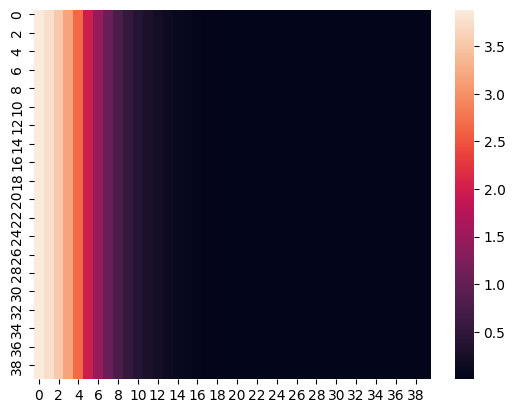

In [10]:
sns.heatmap(t_[0])

In [13]:
model = bio_(target=t_, evolution_one_epochs=5, evolution_two_epochs=5, optimization_epochs=3, 
             gradient_optimization=True, zoom_=True, parameter_optimization=True, 
             condition_optimization=True, store_path="C:\\Users\\yda2\\Desktop\\"
             )

In [14]:
_, _,  = model.fit()

___________________________________________________________________________
                            BioEsAg Algorithm                              
___________________________________________________________________________

Epoch 1/5, Avg/Min Population Cost: 2.6045671684025353/2.5455777165518567
Epoch 2/5, Avg/Min Population Cost: 2.57356250794983/2.5398874509900247
Epoch 3/5, Avg/Min Population Cost: 2.557663284216027/2.537872696074531
Epoch 4/5, Avg/Min Population Cost: 2.5606625157813903/2.536761536831345
Epoch 5/5, Avg/Min Population Cost: 2.5526143456731534/2.5375291159822266

___________________________________________________________________________

Epoch 5/10, Avg/Min Population Cost: 2.39860089281441/2.396078582620972
Epoch 5/10, Avg/Min Population Cost: 2.426069216959873/2.396078582620972
Epoch 5/10, Avg/Min Population Cost: 2.4180743332288466/2.396078582620972
Epoch 5/10, Avg/Min Population Cost: 2.4156696382979606/2.396078582620972
Epoch 5/10, Avg/Min Population Cost

C:\Users\yda2\Downloads\projects\master_project\new_\optimization.py:213: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameters[f"species_{s}"] = torch.tensor(
C:\Users\yda2\Downloads\projects\master_project\new_\optimization.py:230: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameters[f"compartment_{c}"] = torch.tensor(


Iteration 1/3, Cost: 2.3994040489196777
Iteration 2/3, Cost: 2.397141456604004
Iteration 3/3, Cost: 2.394871711730957


In [8]:
c = np.array([2, 7, 45, 12, 4, 0])
m = np.argmin(c)
print(m)

5


In [35]:
y_hat = np.zeros((2, 3, 20, 20))
y_hat[0, 0, :, :] = a_
y_hat[1, 0, :, :] = a_
y_hat[0, 1, :, :] = a_
y_hat[1, 1, :, :] = a_
y_hat[0, 2, :, :] = a_
y_hat[1, 2, :, :] = a_
t = np.zeros((2, 20, 20))
t[0] = a[1]
t[1] = a1[0]
c = co_(y_hat, t, .9, .8)

In [36]:
print(c)

[6.61218418e+15 6.61218418e+15 6.61218418e+15]


In [37]:
print(c.shape)

(3,)


In [15]:
import random
a = 9
b = 12
c = 3
f = a + .8*(c-b)

In [32]:
a = ["a"]

In [33]:
var1, var2 = random.sample(a, 2)

ValueError: Sample larger than population or is negative

In [30]:
var1

'a'

In [31]:
var2

'b'

In [73]:
import numpy as np
def apply_simulation_parameters_mutation(
        population,
        agent,
        mutation_rate,
        min_vals,
        max_vals
):
    agent1, agent2 = random.sample(population, k=2)
    print(agent1)
    print(agent2)
    mutation_mask = np.random.rand(2) < mutation_rate


 
    for i in range(2):
        agent[i] = population[0][i] + 0.8*(agent1[i] - agent2[i]) * mutation_mask[i]
        print(agent[i])
        
        #agent[i] = max(min_vals[i], agent[i])
        #agent[i] = min(max_vals[i], agent[i])
        agent[i] = max(min_vals[i], min(max_vals[i], agent[i]))
       

    return agent

In [74]:
a = apply_simulation_parameters_mutation([(5, 10), (1,3), (2, 5), (5, 6), (0,9), (1,4)], [.01, .01], .9, (-10, -10), (10, 10))

(5, 6)
(1, 3)
8.2
12.4


In [75]:
a

[8.2, 10]

In [93]:
def apply_compartment_mutation(
        population,
        agent,
        mutation_rate,
        min_val,
        max_val,
        F=0.8
):
   
    num_species = 1
    z, y, x = agent.shape
    agent1, agent2 = random.sample(population, k=2)
    print(agent1)
    print(agent2)

    for i in range(num_species):
        mutation_mask = np.random.rand(y, x) < mutation_rate
        agent[i, :, :] = population[0][i, :, :] + F * (agent1[i, :, :] - agent2[i, :, :]) * mutation_mask[i]
        print(agent)
        agent[i, :, :] = np.maximum(agent[i, :, :], min_val)
        agent[i, :, :] = np.minimum(agent[i, :, :], max_val)

    return agent

In [96]:
a = np.zeros((1, 5, 5))
b = np.full((1, 5, 5), fill_value=10)
c = np.full((1, 5, 5), fill_value=1)
d = np.full((1, 5, 5), fill_value=-100)
e = np.full((1, 5, 5), fill_value=100)
f = np.full((1, 5, 5), fill_value=12)
g = np.full((1, 5, 5), fill_value=2)
p = [b ,c, d, e, f, g]

In [97]:
v = apply_compartment_mutation(
        population=p,
        agent=a,
        mutation_rate=.9,
        min_val=0,
        max_val=20)
print(v)

[[[10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]]]
[[[12 12 12 12 12]
  [12 12 12 12 12]
  [12 12 12 12 12]
  [12 12 12 12 12]
  [12 12 12 12 12]]]
[[[10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]]]
[[[10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]
  [10.   8.4  8.4  8.4  8.4]]]


In [181]:
import itertools

def pair_finding(num_species):

    last = num_species + 1
    species = [i for i in range(1, num_species + 2, 1)]
    pairs = list(itertools.combinations(species, 2))

    related_pairs = [pair for pair in pairs if last in pair]
    pair_indices = [((pair[0] - 1) * 2, (pair[1]-1)*2) for pair in related_pairs]

    return pair_indices

In [182]:
g = pair_finding(2)
print(g)

[(0, 4), (2, 4)]


In [183]:
def species_initialization(compartment_size, pairs):
    num_species = len(pairs) + 1
    num_matrices = num_species * 2
    init_matrix = np.zeros((num_matrices, compartment_size[0], compartment_size[1]))

    for i in range(len(pairs)):
        m = np.zeros((2, compartment_size[0], compartment_size[1]))
        m[-1, 0, 0] = int(pairs[i][0])
        m[-1, 0, 1] = int(pairs[i][1])
        m[-1, 1, :4] = np.random.rand(4)
        init_matrix[i*2+2:i*2+4, :, :] = m

    return init_matrix

In [184]:
ind = species_initialization(compartment_size=(10, 10), pairs=g)

In [185]:
ind

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

In [186]:
def species_combine(individual, init_matrix, num_species, num_pairs):
    """
    Combines the new species and its complexes with the existing individual.

    This function takes the existing individual matrix and the initialization matrix for the new species and its
    complexes, and combines them into a single updated individual matrix. It also updates the metadata to reflect
    the addition of the new species and complexes.

    Parameters:
    - individual (numpy.ndarray): The original individual matrix.
    - init_matrix (numpy.ndarray): The initialization matrix for the new species and complexes.
    - num_species (int): The original number of species.
    - num_pairs (int): The original number of complexes.

    Returns:
    - numpy.ndarray: The updated individual matrix with the new species and complexes added.
    """

    z, y, x = individual.shape
    z1 = z + init_matrix.shape[0]

    updated_individual = np.zeros((z1, y, x))
    updated_individual[:num_species * 2, :, :] = individual[:num_species * 2, :, :]
    updated_individual[num_species * 2:num_species * 2 + init_matrix.shape[0], :, :] = init_matrix
    updated_individual[num_species * 2 + init_matrix.shape[0]:, :, :] = individual[num_species * 2:, :, :]
    updated_individual[-1, -1, 0] = int(num_species + 1)
    updated_individual[-1, -1, 1] = int(num_pairs + ((init_matrix.shape[0] - 2) / 2))
    updated_individual[-1, num_species * 2, :3] = np.random.rand(3)

    return updated_individual

In [187]:
ag_ = np.zeros((7, 10, 10))
ag_[-1, 0, :3] = (100, 100, 100)
ag_[-1, 2, :3] = (100, 100, 100)
ag_[-2, 0, :2] = (0, 2)
ag_[-2, 1, :4] = (100, 100, 100, 100)
ag_[-1, -1, :5] = (2, 1, 100, 20, .2)
ag_[1, :, :] = np.full((10, 10),  10)
ag_[3, :, :] = np.full((10, 10),  10)

In [188]:
ag = species_combine(individual=ag_, init_matrix=ind, num_species=2, num_pairs=1)

In [189]:
print(ag.shape)
print(ag)

(13, 10, 10)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[ 10.  10.  10. ...  10.  10.  10.]
  [ 10.  10.  10. ...  10.  10.  10.]
  [ 10.  10.  10. ...  10.  10.  10.]
  ...
  [ 10.  10.  10. ...  10.  10.  10.]
  [ 10.  10.  10. ...  10.  10.  10.]
  [ 10.  10.  10. ...  10.  10.  10.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 ...

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   2.   0. ...   0.   0.   0.]

In [142]:
for i in range(10):
    d = int(np.random.choice(np.arange(2, 5+1)))
    print(d)

2
5
5
2
3
3
5
5
4
2


In [190]:
def apply_species_deletion_mutation(agent, mutation_rate):
    """
    Applies a species deletion mutation to the individual with a given probability.

    This function randomly selects a species and deletes it along with all complexes involving that species
    if a random value is below the specified mutation rate.

    Parameters:
    - individual (numpy.ndarray): The multidimensional array representing the species and complexes.
    - mutation_rate (float): The probability of deleting a species.

    Returns:
    - numpy.ndarray: The updated individual with the species and related complexes removed if the mutation occurred.
    """
    num_species = int(agent[-1, -1, 0])

    if np.random.rand() < mutation_rate and num_species > 1:
        deleted_species = int(np.random.choice(np.arange(2, num_species+1)))

        agent = species_deletion(
            agent=agent,
            deleted_species=deleted_species
        )

    return agent

def species_deletion(agent, deleted_species):
    """
    Deletes a species and all complexes involving that species from the individual matrix.

    Parameters:
    - individual (numpy.ndarray): The individual matrix before deletion.
    - deleted_species (int): The index of the species to be deleted.

    Returns:
    - numpy.ndarray: The updated individual matrix after deletion.
    """
    num_species = int(agent[-1, -1, 0])
    num_pairs = int(agent[-1, -1, 1])
    pair_start = int((num_species * 2) + 1)
    pair_stop = int(pair_start + (num_pairs * 2))

    delete_indices = [(deleted_species-1)*2, ((deleted_species-1)*2)+1]

    for i in range(pair_start, pair_stop, 2):
        if int((agent[i, 0, 0] / 2) + 1) == deleted_species or int((agent[i, 0, 1] / 2) + 1) == deleted_species:
            delete_indices.extend([i - 1, i])

    updated_agent = np.delete(agent, delete_indices, axis=0)

    updated_agent[-1, -1, 0] = num_species - 1
    updated_agent[-1, -1, 1] = num_pairs - len(delete_indices) // 2 + 1

    return updated_agent

In [191]:
gg = apply_species_deletion_mutation(agent=ag, mutation_rate=0.99)
print(gg.shape)
print(gg)

(7, 10, 10)
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000

(13, 5, 5)
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]]

 [[1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
   1.00000000e+01]
  [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
   1.00000000e+01]
  [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
   1.00000000e+01]
  [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
   1.00000000e+01]
  [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
   1.00000000e+01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
 

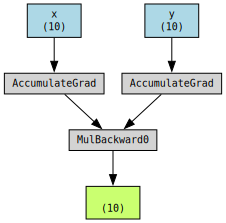

In [2]:
import torch
from torchviz import make_dot

# Example of defining your function
x = torch.randn(10, requires_grad=True)
y = torch.randn(10, requires_grad=True)
z = x * y  # or your model's output

# Visualize the computational graph
make_dot(z, params={"x": x, "y": y})


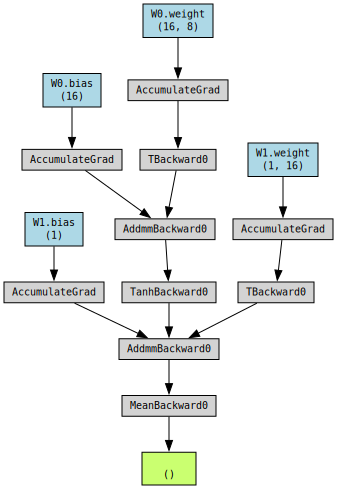

In [1]:
import torch
from torchviz import make_dot
model = torch.nn.Sequential()
model.add_module('W0', torch.nn.Linear(8, 16))
model.add_module('tanh', torch.nn.Tanh())
model.add_module('W1', torch.nn.Linear(16, 1))

x = torch.randn(1, 8)
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()))

In [17]:
import itertools

def apply_species_insertion_mutation(agent, mutation_rate):

    num_species = int(agent[-1, -1, 0])
    num_pairs = int(agent[-1, -1, 1])
    z, y, x = agent.shape

    if np.random.rand() < mutation_rate:
        pairs = pair_finding(
            num_species=num_species
        )
        init_matrix = species_initialization(
            compartment_size=(y, x),
            pairs=pairs
        )
        agent = species_combine(
            agent=agent,
            init_matrix=init_matrix,
            num_species=num_species,
            num_pairs=num_pairs
        )

    return agent

def pair_finding(num_species):

    last = num_species + 1
    species = [i for i in range(1, num_species + 2, 1)]
    pairs = list(itertools.combinations(species, 2))

    related_pairs = [pair for pair in pairs if last in pair]
    pair_indices = [((pair[0] - 1) * 2, (pair[1]-1)*2) for pair in related_pairs]

    return pair_indices



def species_initialization(compartment_size, pairs):

    num_species = len(pairs) + 1
    num_matrices = num_species * 2
    init_matrix = np.zeros((num_matrices, compartment_size[0], compartment_size[1]))
    init_matrix[1, :, :] = np.random.rand(compartment_size[0], compartment_size[1]) * .5

    for i in range(len(pairs)):
        m = np.zeros((2, compartment_size[0], compartment_size[1]))
        m[-1, 0, 0] = int(pairs[i][0])
        m[-1, 0, 1] = int(pairs[i][1])
        m[-1, 1, :4] = np.random.rand(4)
        init_matrix[i*2+2:i*2+4, :, :] = m

    return init_matrix


def species_combine(agent, init_matrix, num_species, num_pairs):

    z, y, x = agent.shape
    z1 = z + init_matrix.shape[0]

    updated_agent = np.zeros((z1, y, x))
    updated_agent[:num_species * 2, :, :] = agent[:num_species * 2, :, :]
    updated_agent[num_species * 2:num_species * 2 + init_matrix.shape[0], :, :] = init_matrix
    updated_agent[num_species * 2 + init_matrix.shape[0]:, :, :] = agent[num_species * 2:, :, :]
    updated_agent[-1, -1, 0] = int(num_species + 1)
    updated_agent[-1, -1, 1] = int(num_pairs + ((init_matrix.shape[0] - 2) / 2))
    updated_agent[-1, num_species * 2, :3] = np.random.rand(3)

    return updated_agent

In [35]:
ag_ = np.zeros((3, 10, 10))
ag_[-1, 0, :3] = (100, 100, 100)
#ag_[-1, 2, :3] = (100, 100, 100)
#ag_[-2, 0, :2] = (0, 2)
#ag_[-2, 1, :4] = (100, 100, 100, 100)
ag_[-1, -1, :5] = (1, 0, 100, 20, .2)
ag_[1, :, :] = np.full((10, 10),  10)
#ag_[3, :, :] = np.full((10, 10),  10)

In [38]:
agn2 = apply_species_insertion_mutation(agent=agn1, mutation_rate=0.99)

In [42]:
def population_initialization(
        population_size, agent_shape, species_parameters, complex_parameters,
        num_species, num_pairs, max_sim_epochs, sim_stop_time, time_step, fixed_agent_shape,
        init_species, init_pairs
):

    init_shape = int((init_species*2) + (init_pairs*2) + 1)
    init_pair_start = int(init_species * 2)
    init_pair_stop = int(init_pair_start + (init_pairs * 2))
    pair_start = int(num_species * 2)
    pair_stop = int(pair_start + (num_pairs * 2))

    if fixed_agent_shape:
        population = [np.zeros(agent_shape) for _ in range(population_size)]

        for ag in population:
            ag[-1, -1, :5] = [num_species, num_pairs, max_sim_epochs, sim_stop_time, time_step]
            
            for i in range(0, num_species * 2, 2):
                ag[-1, i, :3] = species_parameters[int(i // 2)]
                ag[i + 1, :, :] = np.random.rand(agent_shape[1], agent_shape[2]) * 0.5

            for i in range(pair_start + 1, pair_stop + 1, 2):
                ag[i, 0, :2] = complex_parameters[int((i - (pair_start + 1)) // 2)][0]
                ag[i, 1, :4] = complex_parameters[int((i - (pair_start + 1)) // 2)][1]

    else:
        population = [np.zeros((init_shape, agent_shape[1], agent_shape[2])) for _ in range(population_size)]
        for ag in population:
            ag[-1, -1, :5] = [init_species, init_pairs, max_sim_epochs, sim_stop_time, time_step]
            for i in range(0, init_species * 2, 2):
                ag[-1, i, :3] = species_parameters[int(i // 2)]
                ag[i + 1, :, :] = np.random.rand(agent_shape[1], agent_shape[2]) * 0.5

            for i in range(init_pair_start + 1, init_pair_stop + 1, 2):
                ag[i, 0, :2] = complex_parameters[int((i - (init_pair_start + 1)) // 2)][0]
                ag[i, 1, :4] = complex_parameters[int((i - (init_pair_start + 1)) // 2)][1]

    return population



In [51]:
pop = population_initialization(
    population_size=1,
    agent_shape=(7, 5, 5),
    species_parameters=[(.1, .2, .3), (.4, .5, .6)], complex_parameters=[[(0, 2), (.1, .2, .3, .4)]],
    num_species=2,
    num_pairs=1,
    max_sim_epochs=100,
    sim_stop_time=20,
    time_step=0.2,
    fixed_agent_shape=False,
    init_species=2,
    init_pairs=1
)

In [52]:
print(pop)

[array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]],

       [[2.94438424e-02, 4.60368780e-01, 3.00505123e-01, 3.83272562e-01,
         8.25017496e-03],
        [4.99155813e-01, 1.37187036e-01, 3.08976392e-02, 1.23135137e-01,
         1.79886907e-01],
        [4.07807901e-02, 2.20562760e-01, 5.19999138e-02, 2.86702603e-01,
         9.46336658e-02],
        [2.53263213e-01, 2.45353009e-01, 2.10065131e-01, 3.48292080e-01,
         1.08156891e-01],
        [7.49159446e-02, 4.79436415e-01, 3.56058999e-01, 4.25318106e-01,
         1.43758841e-01]],

     

In [54]:
pop_ = [np.zeros((2, 10, 10)), np.zeros((1, 3, 4)), np.zeros((2, 3, 5))]
agent = np.zeros((2, 1, 4))
pop = [ag for ag in pop_ if ag.shape[0] == agent.shape[0]]

In [62]:
import random
p = [1, 2, 6]
v, s, n = random.sample(p, k=3)

In [63]:
v

1

In [64]:
s

6

In [65]:
n

2

In [66]:
import numpy as np

# Example 1D array with NaN and Inf values
array = np.array([1.0, np.nan, 2.5, np.inf, -np.inf, 3.0])

# Replace all NaN and Inf values with a constant, e.g., 0
constant_value = 0
array[np.isnan(array) | np.isinf(array)] = constant_value

print(array)


[1.  0.  2.5 0.  0.  3. ]


In [67]:
d = np.array([1,4,9,1,2,0,5,3])
f = np.sort(d)
print(f)

[0 1 1 2 3 4 5 9]
